In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("city_day.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


<Axes: >

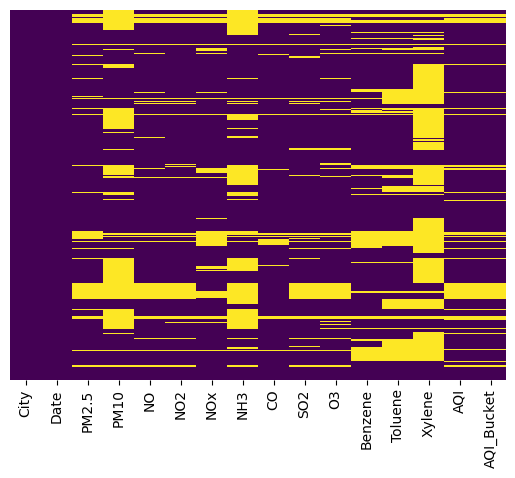

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
print(data.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64

In [ ]:
df.describe() # but it gives the information about all the cities alltogether

,PM2.5,PM10,NH3,CO,SO2,O3,AQI
count,24933.000000,18391.000000,19203.000000,27472.000000,25677.000000,25509.000000,24850.000000
mean,67.450578,118.127103,23.483476,2.248598,14.531977,34.491430,166.463581
std,64.661449,90.605110,25.684275,6.962884,18.133775,21.694928,140.696585
min,0.040000,0.010000,0.010000,0.000000,0.010000,0.010000,13.000000
25%,28.820000,56.255000,8.580000,0.510000,5.670000,18.860000,81.000000
50%,48.570000,95.680000,15.850000,0.890000,9.160000,30.840000,118.000000
75%,80.590000,149.745000,30.020000,1.450000,15.220000,45.570000,208.000000
max,949.990000,1000.000000,352.890000,175.810000,193.860000,257.730000,2049.000000


Distribution of different pollutants in last 5 years


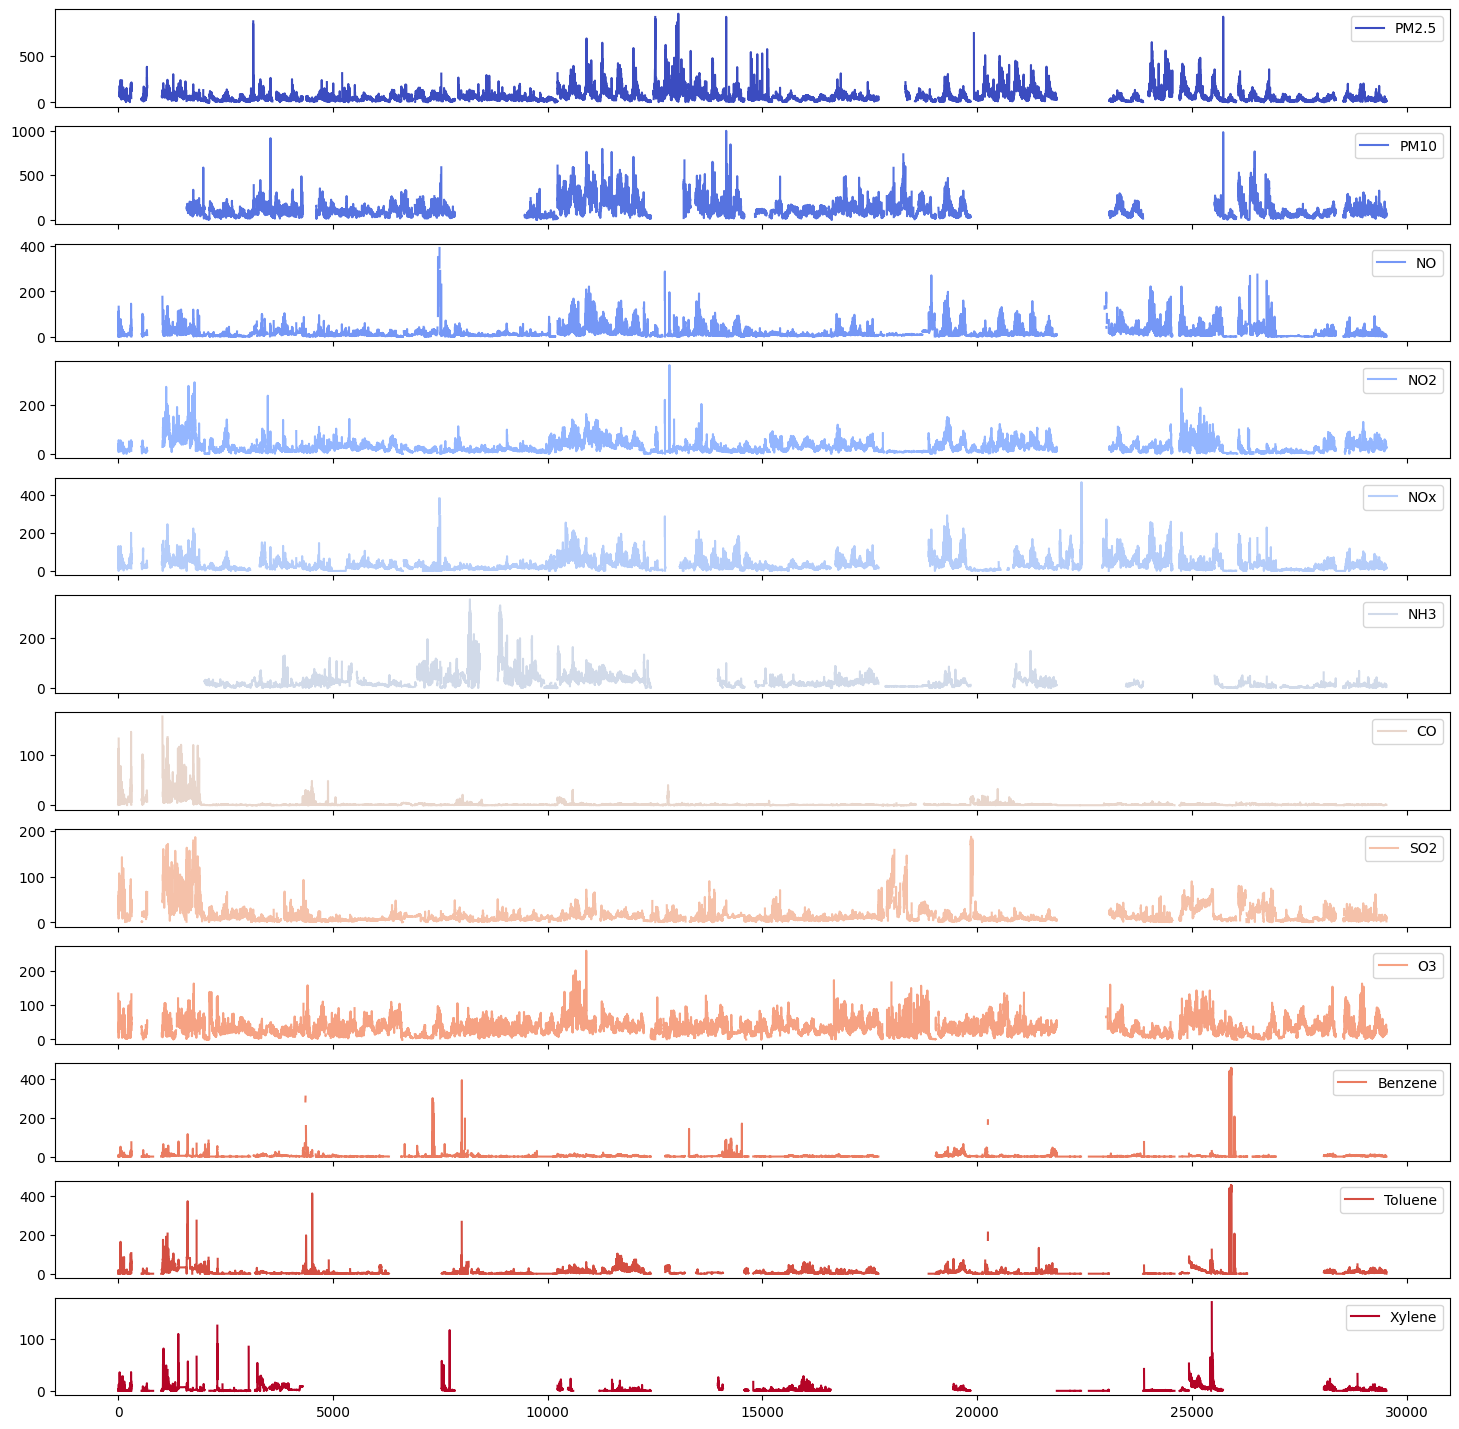

In [ ]:
df_city_day = data.copy()
df_city_day.columns
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants in last 5 years')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);



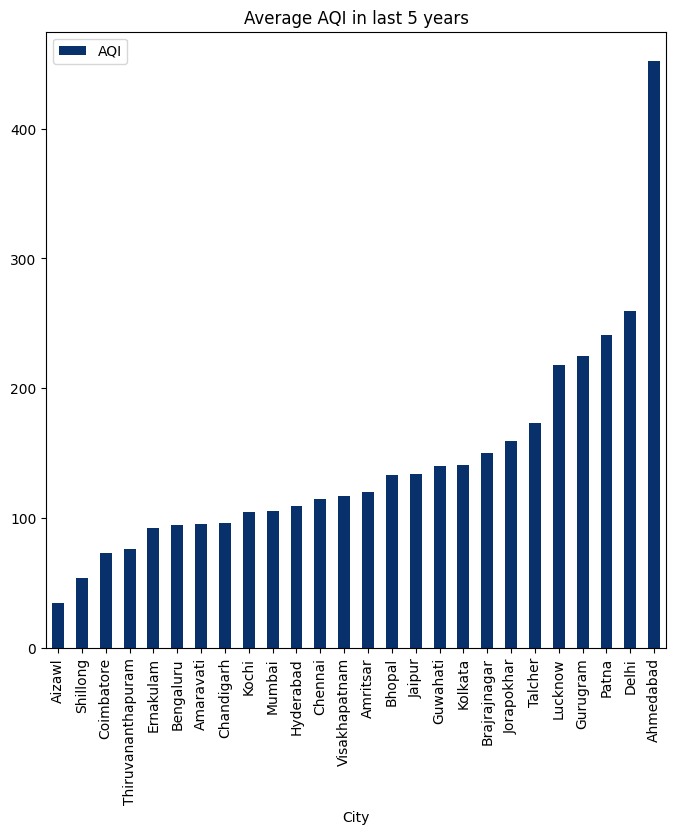

In [ ]:
data[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

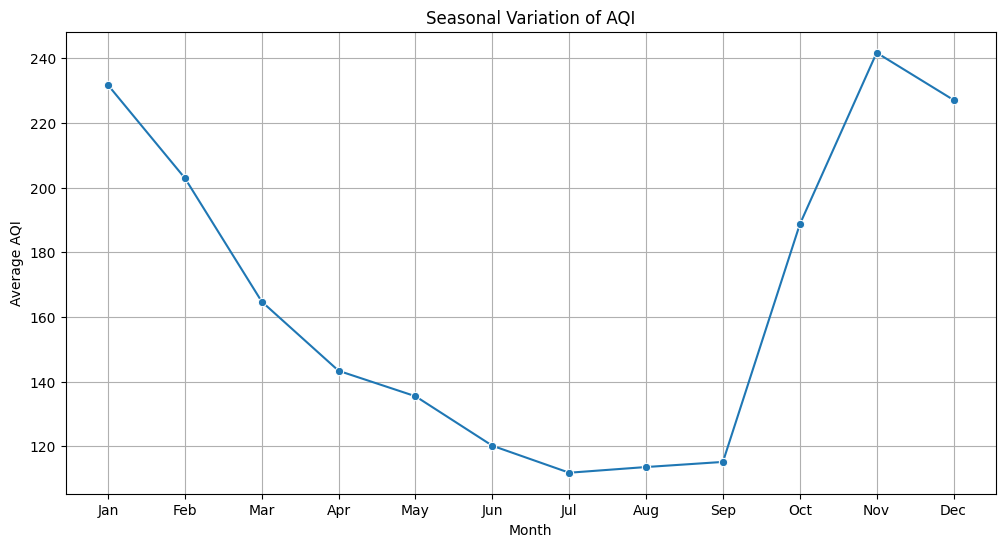

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
# Extract month and year from the Date column
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Compute monthly mean AQI across all years
monthly_aqi_means = data.groupby('Month')['AQI'].mean()

# Plot monthly variation of AQI
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_aqi_means.index, y=monthly_aqi_means.values, marker='o')
plt.title('Seasonal Variation of AQI')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

<ipython-input-101-854184c8ce78>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y=pollutant, data=data, label=pollutant, ci=None)
<ipython-input-101-854184c8ce78>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y=pollutant, data=data, label=pollutant, ci=None)
<ipython-input-101-854184c8ce78>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y=pollutant, data=data, label=pollutant, ci=None)
<ipython-input-101-854184c8ce78>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y=pollutant, data=data, label=pollutant, ci=None)
<ipython-input-101-854184c8ce78>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y=pollutant, data=data, label=

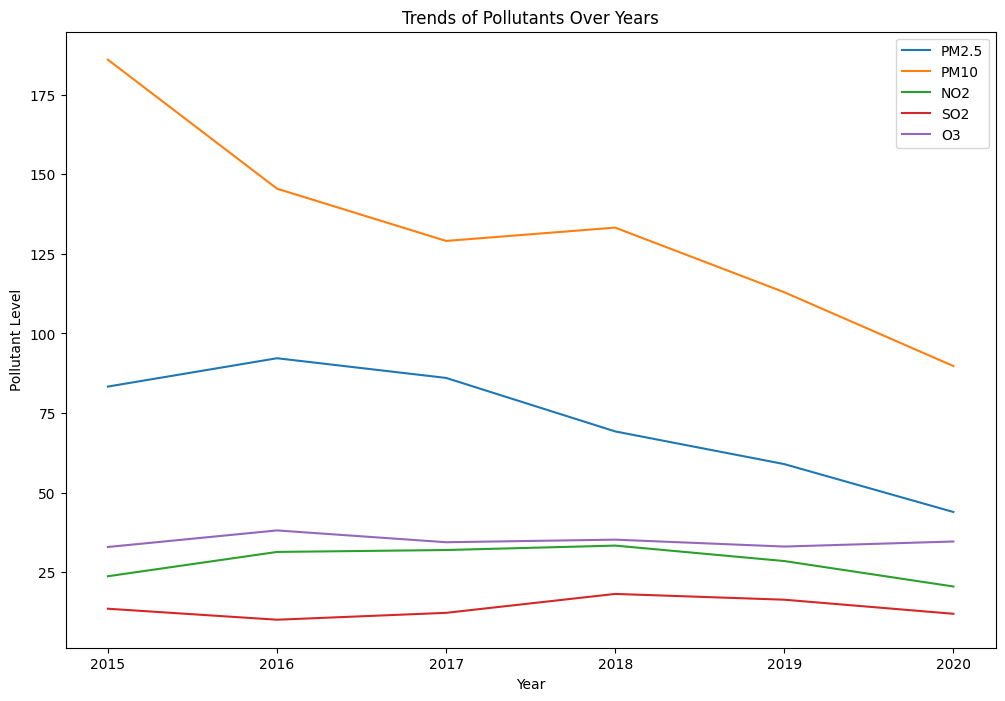

<ipython-input-101-854184c8ce78>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y=pollutant, data=data, label=pollutant, ci=None)
<ipython-input-101-854184c8ce78>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y=pollutant, data=data, label=pollutant, ci=None)
<ipython-input-101-854184c8ce78>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y=pollutant, data=data, label=pollutant, ci=None)
<ipython-input-101-854184c8ce78>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y=pollutant, data=data, label=pollutant, ci=None)
<ipython-input-101-854184c8ce78>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y=pollutant, data=da

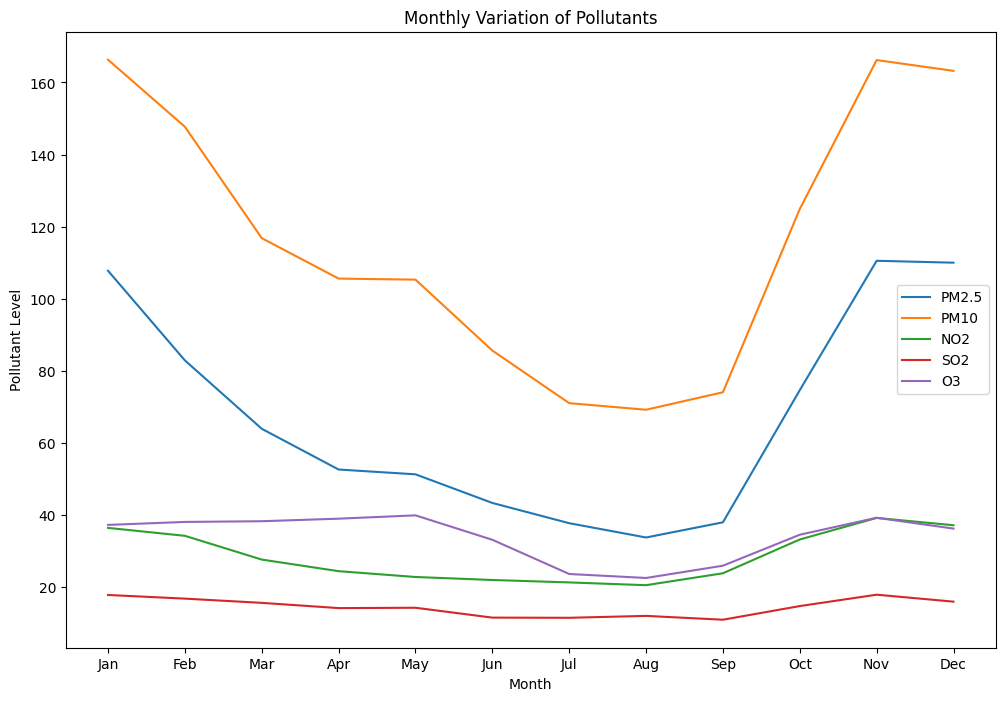

In [ ]:
# Define the pollutants of interest
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3']

# Plot trends of pollutants over years
plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    sns.lineplot(x='Year', y=pollutant, data=data, label=pollutant, ci=None)
plt.title('Trends of Pollutants Over Years')
plt.xlabel('Year')
plt.ylabel('Pollutant Level')
plt.legend()
plt.show()

# Plot monthly variation of pollutants
plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    sns.lineplot(x='Month', y=pollutant, data=data, label=pollutant, ci=None)
plt.title('Monthly Variation of Pollutants')
plt.xlabel('Month')
plt.ylabel('Pollutant Level')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
data.drop(["City","Date","NO","NOx", "Benzene", "Toluene", "Xylene","AQI_Bucket"], axis=1, inplace=True)

In [ ]:
data

,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI,Month,Year
0,NaN,NaN,18.22,NaN,0.92,27.64,133.36,NaN,1,2015
1,NaN,NaN,15.69,NaN,0.97,24.55,34.06,NaN,1,2015
2,NaN,NaN,19.30,NaN,17.40,29.07,30.70,NaN,1,2015
3,NaN,NaN,18.48,NaN,1.70,18.59,36.08,NaN,1,2015
4,NaN,NaN,21.42,NaN,22.10,39.33,39.31,NaN,1,2015
...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,25.06,12.47,0.47,8.55,23.30,41.0,6,2020
29527,24.38,74.09,26.06,11.99,0.52,12.72,30.14,70.0,6,2020
29528,22.91,65.73,29.53,10.71,0.48,8.42,30.96,68.0,6,2020
29529,16.64,49.97,29.26,10.03,0.52,9.84,28.30,54.0,6,2020


In [ ]:
data = data.dropna().reset_index(drop=True)

<Axes: >

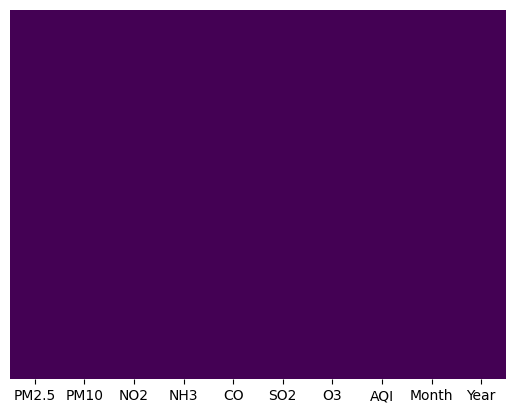

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data["AQI"].values[data["AQI"] > 499] = 500

In [ ]:
data

,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI
0,31.21,38.66,1.27,25.63,0.56,4.22,2.81,52.0
1,38.39,46.68,0.91,29.16,0.57,4.46,0.18,60.0
2,43.23,50.83,1.07,28.95,0.57,4.53,0.41,62.0
3,33.82,41.03,0.36,28.41,0.48,4.63,0.30,70.0
4,27.14,35.04,2.32,23.98,0.50,4.71,13.02,54.0
...,...,...,...,...,...,...,...,...
14397,15.02,50.94,25.06,12.47,0.47,8.55,23.30,41.0
14398,24.38,74.09,26.06,11.99,0.52,12.72,30.14,70.0
14399,22.91,65.73,29.53,10.71,0.48,8.42,30.96,68.0
14400,16.64,49.97,29.26,10.03,0.52,9.84,28.30,54.0


In [ ]:


# Splitting data into X and y
X = data.iloc[:, :-1]  # Independent features
y = data.iloc[:, -1]  # Dependent feature


In [ ]:
X_train_unseen, X_test_unseen, y_train_unseen, y_test_unseen = train_test_split(X, y, test_size=0.05, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_train_unseen, y_train_unseen, test_size=0.20, random_state=1)


In [ ]:
train_pool = Pool(X_train, y_train, cat_features=[])  # Assuming no categorical features
test_pool = Pool(X_test, y_test, cat_features=[])

In [ ]:
model = CatBoostRegressor(
    iterations=552,  # From Random Forest tuning
    learning_rate=0.1,  # Common starting point for CatBoost
    max_depth=7,  # From Random Forest tuning
    loss_function="RMSE",  # Suitable for regression with squared error
    eval_metric="RMSE"  # Track RMSE during training
)


In [ ]:
model.fit(train_pool, eval_set=test_pool, verbose=False)  # Suppress training messages

In [ ]:
predictions = model.predict(X_test)
print("Coefficient of Determination (R^2) for train dataset: ", model.score(X_train, y_train))
print("Coefficient of Determination (R^2) for test dataset: ", model.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))


Coefficient of Determination (R^2) for train dataset:  0.9702917424183752
Coefficient of Determination (R^2) for test dataset:  0.9343253033859241
MAE: 14.776416958088507
MSE: 558.286897356798
RMSE: 23.62809550845768
